# Correlations and statistics


**Analyses:** :
- Pearson correlation test
- Spearman correlation test



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pearsonr
from scipy.stats import spearmanr


In [14]:
df_param1 = pd.read_csv('../data/DEB_parametersI.csv')
df_param2 = pd.read_csv('../data/DEB_parametersII.csv')
df_pca = pd.read_csv('../data/pca.csv')

# display(df_param1.head())
# display(df_param2.head())

#missing values
# print(df_param1.isnull().sum())
# print(df_param2.isnull().sum())

#drop last 6 columns
df_param2 = df_param2.drop(df_param2.columns[-7:], axis=1)
display(df_param2.head())

#drop last 10 columns
df_param1 = df_param1.drop(df_param1.columns[-10:], axis=1)
display(df_param1.head())


,Species,v,kap,kap_R,p_M,k_J,kap_G
0,Symsagittifera roscoffensis,0.02307,0.9000,0.475,99.360,0.002000,0.8013
1,Aequipecten opercularis,0.01667,1.0000,0.475,38.790,0.002000,0.8019
2,Mimachlamys varia,0.01802,1.0000,0.950,23.370,0.002000,0.7975
3,Mytilus edulis,0.06100,0.9965,0.950,2.646,0.000191,0.8019
4,Panopea abbreviata,0.03239,0.8000,0.950,17.080,0.002000,0.7990


,ID,Phylum,Class,Order,Family,ScientificName,CommonName,Mod,E_Hb,s_G,...,kap_P,h_a,v,E_G,kap_R,kap_X,k_J,F_m,p_T,kap
0,Symsagittifera_roscoffensis,Xenacoelomorpha,Acoelomorpha,Acoela,Sagittiferidae,Symsagittifera roscoffensis,Mint-sauce Worm,abj,5.684000e-04,0.0001,...,0.1000,2.235000e-07,0.023075,1305.42,0.475,0.8000,0.002000,6.5,0.0,0.90000
1,Aequipecten_opercularis,Mollusca,Bivalvia,Pectinida,Pectinidae,Aequipecten opercularis,Queen scallop,abj,9.004000e-09,0.0001,...,0.1000,3.605000e-08,0.016669,2347.98,0.475,0.8000,0.002000,6.5,0.0,0.99997
2,Mimachlamys_varia,Mollusca,Bivalvia,Pectinida,Pectinidae,Mimachlamys varia,Variegated scallop,abj,1.621000e-08,0.0001,...,0.1000,1.276000e-08,0.018024,2361.00,0.950,0.8000,0.002000,6.5,0.0,0.99995
3,Mytilus_edulis,Mollusca,Bivalvia,Mytiloida,Mytilidae,Mytilus edulis,Blue mussel,abj,2.317000e-07,0.0001,...,0.0493,4.282000e-09,0.060999,2348.00,0.950,0.9485,0.000191,105.6,0.0,0.99649
4,Panopea_abbreviata,Mollusca,Bivalvia,Adapedonta,Hiatellidae,Panopea abbreviata,Southern geoduck,abj,4.101000e-04,0.0001,...,0.1000,1.319000e-11,0.032387,2356.53,0.950,0.8000,0.002000,6.5,0.0,0.80000


In [ ]:
df_param2['Species'] = df_param2['Species'].str.replace(' ', '_').str.strip()
df_pca['Species'] = df_pca['Species'].str.strip()

df_param1.rename(columns={'ID': 'Species'}, inplace=True)


#drop "PC2" column
# df_pca = df_pca.drop('PC2', axis=1)
# display(df_pca.head())

#merge the dataframes
df2 = pd.merge(df_param2, df_pca, on='Species', how='inner')
df1= pd.merge(df_param1, df_pca, on='Species', how='inner')


df_num = df1.select_dtypes(include='number')
params_to_test1 = df_num.columns.drop('PC1')

params_to_test2 = df2.columns.drop(["PC1", "Species"])



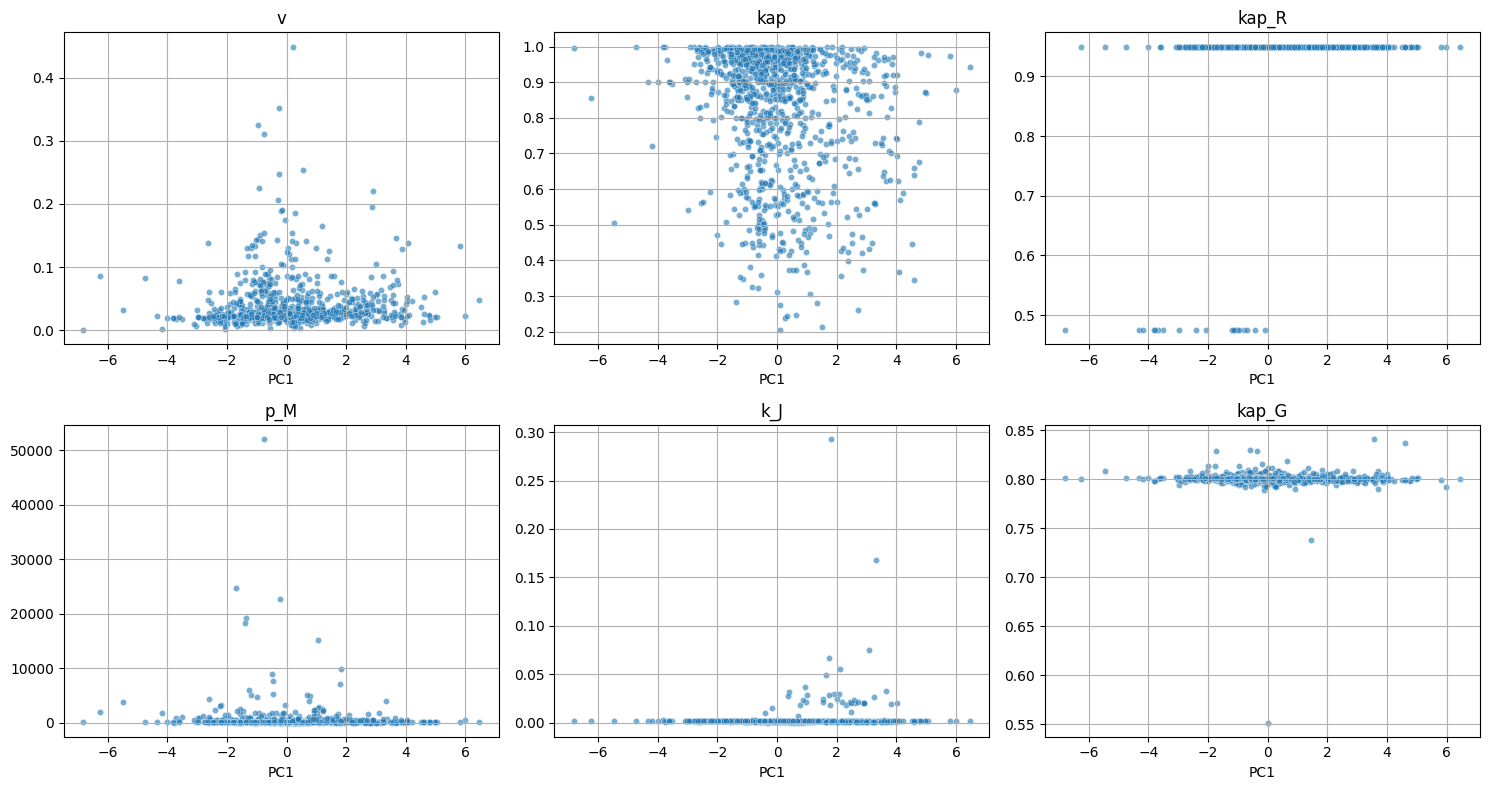

In [ ]:
# scatterplot

params_to_test2 = df2.columns.drop(["PC1", "Species"])

params_to_plot = params_to_test2  

n = len(params_to_plot)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, param in enumerate(params_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=df2, x='PC1', y=param, alpha=0.6, s=20)
    plt.title(param)
    plt.xlabel('PC1')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Pearson test

results = []

for param in params_to_test2:
    
    r, p = pearsonr(df2['PC1'], df2[param])
    
    results.append({
        "Parameter": param,
        "Pearson r": round(r, 3),
        "p-value": round(p, 4),
        "n": len(df2)
    })

results_pearson_df2 = pd.DataFrame(results)
results_pearson_df2

,Parameter,Pearson r,p-value,n
0,v,0.081,0.0082,1058
1,kap,-0.189,0.0000,1058
2,kap_R,0.201,0.0000,1058
3,p_M,-0.045,0.1443,1058
4,k_J,0.138,0.0000,1058
5,kap_G,-0.019,0.5350,1058


In [ ]:
# Spearman test

results_spearman = []

for param in params_to_test2:
    r, p = spearmanr(df2['PC1'], df2[param])
    
    results_spearman.append({
        'Parameter': param,
        'Spearman rs': round(r, 3),
        'p-value': round(p, 4),
    })

results_spearman_df2 = pd.DataFrame(results_spearman)
results_spearman_df2


,Parameter,Spearman rs,p-value
0,v,0.169,0.0000
1,kap,-0.211,0.0000
2,kap_R,0.164,0.0000
3,p_M,-0.133,0.0000
4,k_J,-0.080,0.0096
5,kap_G,-0.150,0.0000


In [23]:
merged_results = pd.merge(results_pearson_df2, results_spearman_df2, on="Parameter")
merged_results


,Parameter,Pearson r,p-value_x,n,Spearman rs,p-value_y
0,v,0.081,0.0082,1058,0.169,0.0000
1,kap,-0.189,0.0000,1058,-0.211,0.0000
2,kap_R,0.201,0.0000,1058,0.164,0.0000
3,p_M,-0.045,0.1443,1058,-0.133,0.0000
4,k_J,0.138,0.0000,1058,-0.080,0.0096
5,kap_G,-0.019,0.5350,1058,-0.150,0.0000


add interpretation column